In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import torch.nn as nn
import torch

In [3]:
data = load_breast_cancer()

In [9]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [150]:
X, y = data.data, data.target

In [151]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [152]:
X.shape, y.shape

((569, 30), (569,))

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

In [154]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((381, 30), (381,), (188, 30), (188,))

In [155]:
scaler = StandardScaler()

In [156]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [157]:
X_train.shape[1]

30

In [170]:
model = nn.Sequential(
    nn.Linear(X_train.shape[1], 1), 
    nn.Sigmoid()
)

In [171]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(params=model.parameters())

In [160]:
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1, 1))
y_test = torch.from_numpy(y_test.astype(np.float32).reshape(-1, 1))

In [172]:
n_epochs = 2000

train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

train_accuracy = np.zeros(n_epochs)
test_accuracy = np.zeros(n_epochs)

for epoch in range(n_epochs):
    optimizer.zero_grad()
    
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    
    loss.backward()
    optimizer.step()        
    
    output_test = model(X_test)
    loss_test = criterion(output_test, y_test)
    
    with torch.no_grad():
        train_pred = model(X_train)
        train_pred = np.round(train_pred.numpy())
        train_acc = np.mean(train_pred == y_train.numpy())
        train_accuracy[epoch] = train_acc
        
        test_pred = model(X_test)
        test_pred = np.round(test_pred.numpy())
        test_acc = np.mean(test_pred == y_test.numpy())
        test_accuracy[epoch] = test_acc
    
    test_losses[epoch] = loss_test.item()
    train_losses[epoch] = loss.item()
    
    if (epoch + 1) % 50 == 0:
        print(f"Epoch: {epoch + 1}/{n_epochs}, Train Loss: {loss.item():.4f}, Test Loss: {loss_test.item():.4f}")

Epoch: 50/2000, Train Loss: 0.5234, Test Loss: 0.5189
Epoch: 100/2000, Train Loss: 0.3810, Test Loss: 0.3805
Epoch: 150/2000, Train Loss: 0.3041, Test Loss: 0.3066
Epoch: 200/2000, Train Loss: 0.2563, Test Loss: 0.2601
Epoch: 250/2000, Train Loss: 0.2236, Test Loss: 0.2278
Epoch: 300/2000, Train Loss: 0.2000, Test Loss: 0.2039
Epoch: 350/2000, Train Loss: 0.1822, Test Loss: 0.1855
Epoch: 400/2000, Train Loss: 0.1682, Test Loss: 0.1708
Epoch: 450/2000, Train Loss: 0.1570, Test Loss: 0.1588
Epoch: 500/2000, Train Loss: 0.1478, Test Loss: 0.1488
Epoch: 550/2000, Train Loss: 0.1401, Test Loss: 0.1403
Epoch: 600/2000, Train Loss: 0.1336, Test Loss: 0.1330
Epoch: 650/2000, Train Loss: 0.1279, Test Loss: 0.1267
Epoch: 700/2000, Train Loss: 0.1230, Test Loss: 0.1212
Epoch: 750/2000, Train Loss: 0.1187, Test Loss: 0.1163
Epoch: 800/2000, Train Loss: 0.1149, Test Loss: 0.1120
Epoch: 850/2000, Train Loss: 0.1114, Test Loss: 0.1081
Epoch: 900/2000, Train Loss: 0.1083, Test Loss: 0.1045
Epoch: 950/

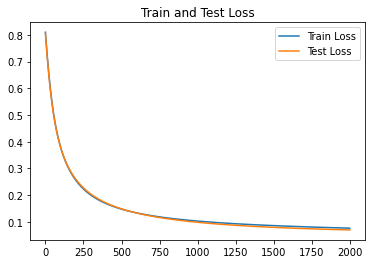

In [174]:
plt.plot(train_losses, label="Train Loss")
plt.plot(test_losses, label="Test Loss")
plt.title("Train and Test Loss", fontsize=12)
plt.legend()
plt.show()

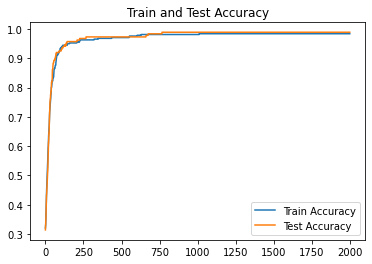

In [175]:
plt.plot(train_accuracy, label="Train Accuracy")
plt.plot(test_accuracy, label="Test Accuracy")
plt.title("Train and Test Accuracy", fontsize=12)
plt.legend()
plt.show()

In [169]:
with torch.no_grad():
    p_train = model(X_train)
    p_train = np.round(p_train.numpy())
    train_acc = np.mean(p_train == y_train.numpy())
    
    p_test = model(X_test)
    p_test = np.round(p_test.numpy())
    test_acc = np.mean(p_test == y_test.numpy())
    
print(f"Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}")

Train Acc: 0.9843, Test Acc: 0.9840


In [188]:
model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.3026, -0.5249, -0.3006, -0.5579, -0.2754, -0.3624, -0.5185, -0.4391,
                       -0.1973,  0.8882, -0.7486,  0.1630, -0.4494, -0.4808, -0.2394,  0.4215,
                       -0.2114, -0.3973,  0.4877,  0.8692, -0.5317, -0.8505, -0.4981, -0.3045,
                       -0.3760, -0.2474, -0.5212, -0.2994, -0.7092, -0.4406]])),
             ('0.bias', tensor([0.6400]))])

In [189]:
torch.save(model.state_dict(), "mymodel.pt")

In [192]:
model2 = nn.Sequential(
    nn.Linear(X_train.shape[1], 1), 
    nn.Sigmoid()
)
model2.load_state_dict(torch.load("mymodel.pt"))

<All keys matched successfully>

In [193]:
with torch.no_grad():
    p_train = model2(X_train)
    p_train = np.round(p_train.numpy())
    train_acc = np.mean(p_train == y_train.numpy())
    
    p_test = model2(X_test)
    p_test = np.round(p_test.numpy())
    test_acc = np.mean(p_test == y_test.numpy())
    
print(f"Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}")

Train Acc: 0.9843, Test Acc: 0.9894
